In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import torch.nn.functional as F
import torch
from torch import nn
from torch.utils.data import Dataset, DataLoader, TensorDataset
import matplotlib.pyplot as plt


In [21]:
df = pd.read_csv("/Users/n_thurai/workspace/comp_6731/project_shiyuan/dermatology/dermatology.csv")
df.head()

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,disappearance_granular_layer,vacuolisation_damage_basal_layer,spongiosis,saw_tooth_appearance_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_mononuclear_infiltrate,band_like_infiltrate,age,class
0,2,2,0,3,0,0,0,0,1,0,...,0,0,3,0,0,0,1,0,55,2
1,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,0,1,0,8,1
2,2,1,2,3,1,3,0,3,0,0,...,0,2,3,2,0,0,2,3,26,3
3,2,2,2,0,0,0,0,0,3,2,...,3,0,0,0,0,0,3,0,40,1
4,2,3,2,2,2,2,0,2,0,0,...,2,3,2,3,0,0,2,3,45,3


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 35 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   erythema                             366 non-null    int64 
 1   scaling                              366 non-null    int64 
 2   definite_borders                     366 non-null    int64 
 3   itching                              366 non-null    int64 
 4   koebner_phenomenon                   366 non-null    int64 
 5   polygonal_papules                    366 non-null    int64 
 6   follicular_papules                   366 non-null    int64 
 7   oral_mucosal_involvement             366 non-null    int64 
 8   knee_and_elbow_involvement           366 non-null    int64 
 9   scalp_involvement                    366 non-null    int64 
 10  family_history                       366 non-null    int64 
 11  melanin_incontinence                 366 non-

In [23]:
df['class'].unique()

array([2, 1, 3, 5, 4, 6])

In [24]:
df['age'] = pd.to_numeric(df['age'] , errors = 'coerce')
df['age'].fillna(df['age'].median(), inplace=True) 
Y = df['class'].values
X = df.drop(columns = ['class']).values
Y = Y - 1

/var/folders/yn/x7s1hd2d2mbbrmqvhk7ptddr0000gn/T/ipykernel_18164/982759420.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].median(), inplace=True)


In [25]:
Y

array([1, 0, 2, 0, 2, 1, 4, 2, 3, 3, 0, 1, 1, 0, 2, 3, 1, 0, 2, 4, 5, 1,
       4, 2, 4, 0, 5, 4, 1, 2, 0, 1, 0, 0, 3, 1, 2, 1, 2, 0, 1, 3, 0, 1,
       4, 2, 3, 5, 1, 2, 2, 3, 0, 0, 4, 0, 1, 2, 3, 1, 5, 0, 4, 0, 1, 2,
       0, 3, 4, 0, 1, 5, 2, 4, 3, 1, 1, 0, 2, 4, 0, 1, 1, 1, 4, 0, 0, 2,
       0, 3, 1, 1, 4, 0, 2, 3, 1, 4, 0, 5, 1, 4, 0, 1, 1, 0, 3, 0, 2, 0,
       0, 2, 4, 2, 2, 4, 1, 2, 3, 0, 1, 4, 5, 0, 0, 1, 5, 2, 4, 3, 0, 0,
       2, 4, 4, 0, 3, 1, 2, 0, 1, 0, 0, 2, 2, 2, 1, 4, 3, 1, 1, 0, 0, 0,
       4, 2, 1, 2, 1, 1, 3, 1, 2, 5, 1, 0, 0, 2, 3, 2, 2, 0, 0, 0, 2, 0,
       0, 1, 2, 2, 0, 0, 0, 0, 5, 1, 1, 1, 1, 0, 2, 2, 2, 0, 0, 1, 2, 1,
       1, 1, 4, 4, 4, 4, 4, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 3, 3,
       3, 3, 4, 4, 4, 4, 4, 4, 4, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 5, 5, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 4, 4,
       4, 4, 5, 5, 5, 3, 3, 3, 0, 0, 0, 0, 0, 1, 1, 3, 3, 3, 0, 0, 1, 1,
       1, 2, 2, 2, 2, 0, 0, 0, 0, 4, 4, 4, 4, 4, 2,

In [26]:
# data split
x_trainval, x_test, y_trainval, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)
x_train, x_val, y_train, y_val = train_test_split(x_trainval, y_trainval, random_state = 42)

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_val = scaler.transform(x_val)
x_test = scaler.transform(x_test)

# Convert to pytorch tensor
x_train_tensor = torch.tensor(x_train, dtype = torch.float32)
x_val_tensor = torch.tensor(x_val, dtype = torch.float32)
x_test_tensor = torch.tensor(x_test, dtype = torch.float32)
y_train_tensor = torch.tensor(y_train, dtype = torch.long)
y_val_tensor = torch.tensor(y_val, dtype = torch.long)
y_test_tensor = torch.tensor(y_test, dtype = torch.long)

train_ds = TensorDataset(x_train_tensor, y_train_tensor)
val_ds = TensorDataset(x_val_tensor, y_val_tensor)
test_ds = TensorDataset(x_test_tensor, y_test_tensor)

train_loader = DataLoader(train_ds, batch_size = 32, shuffle = True)
val_loader = DataLoader(val_ds, batch_size = 64, shuffle = False)
test_loader = DataLoader(test_ds, batch_size = 64, shuffle = False)

Model

In [27]:
class Neural_Network(nn.Module):
  def __init__(self, input_size, hidden_dim = 128):
    super(Neural_Network, self).__init__()
    self.fc1 = nn.Linear(input_size, 128)
    self.af1 = nn.ReLU()
    self.fc2 = nn.Linear(128, hidden_dim)
    self.af2 = nn.ReLU()
    self.output = nn.Linear(hidden_dim, len(np.unique(Y)))

  def forward(self, x):
    x = self.af1(self.fc1(x))
    x = self.af2(self.fc2(x))
    return x, self.output(x)

In [28]:
model = Neural_Network(input_size = x_train_tensor.shape[1])
print(model)
criterion = nn.CrossEntropyLoss() ################ Replace later
optimizer = torch.optim.Adam(model.parameters(), lr = 0.001)
#scheduler = ReduceLROnPlateau(optimizer, mode = 'min', factor = 0.5, patience = 5) # lr will be reduced when the validation loss hasn't decreased for 5 epochs
     

Neural_Network(
  (fc1): Linear(in_features=34, out_features=128, bias=True)
  (af1): ReLU()
  (fc2): Linear(in_features=128, out_features=128, bias=True)
  (af2): ReLU()
  (output): Linear(in_features=128, out_features=6, bias=True)
)


In [29]:
epochs = 1000
sigma = 1
best_val_loss = float('inf')
best_val_acc = 0
patience = 10
patience_counter = 0
best_model_state = None


loss_val_list = []
acc_val_list = []
loss_train_list = []
acc_train_list = []

In [30]:
def Gaussian_similarity(f, w_j, sigma):
    diff = f.unsqueeze(1) - w_j.unsqueeze(0)
    sim = torch.exp(- (diff ** 2).sum(dim = 2) / sigma)
    return sim

In [36]:
def Lmv_loss(f, labels, sigma, prototypes):
    unique_labels = labels.unique()
    class_losses = []

    for c in unique_labels:
        idx = (c == labels)
        # feature space of the current class
        feat = f[idx]

        # check if there are at least 2 samples in the same class
        if feat.shape[0] < 2:
            continue

        # compute centroid 
        # centroid = feat.mean(dim = 0, keepdim = True)
        sim = Gaussian_similarity(feat, prototypes, sigma)
        min_sim = sim.min().detach()


        # compute loss
        class_loss = ((sim - min_sim) ** 2).mean()
        class_losses.append(class_loss)

    if not class_losses:
        return torch.tensor(0.0)

    # compute the avg loss for current batch
    L_mv = torch.stack(class_losses).mean()

    return L_mv



In [32]:
# def Lmv_loss(f, w, labels, beta, sigma):
#     # compute sim to all weights
#     sim = Gaussian_similarity(f, w, sigma)

def Lmm_loss(features, labels, prototypes, beta=0.5, sigma=1.0):
    """
    features:   [B, D]
    labels:     [B]
    prototypes: [C, D]  (e.g. model.output.weight)
    """
    B = features.size(0)
    sims = Gaussian_similarity(features, prototypes, sigma=sigma)  # [B, C]

    pos_sim = sims[torch.arange(B), labels]  # [B]

    mask = torch.ones_like(sims, dtype=torch.bool)
    mask[torch.arange(B), labels] = False
    neg_sims = sims.masked_fill(~mask, float('-inf'))
    hard_neg_sim, _ = neg_sims.max(dim=1)  # [B]

    margin_violation = F.relu(beta + hard_neg_sim - pos_sim)
    L_mm = (margin_violation ** 2).mean()
    return L_mm


In [33]:
for epoch in range(epochs):
    model.train()
    train_losses = 0
    correct_train = 0
    total_train = 0
    

    for x_batch, y_batch in train_loader:
        optimizer.zero_grad()
        f, output_train = model(x_batch)
        
        cross_entropy_loss = F.cross_entropy(output_train, y_batch)
        L_mv = Lmv_loss(f, y_batch, sigma, model.output.weight)
        L_mm = Lmm_loss(f, y_batch, model.output.weight)
        L_mvmm = 0.5 * (L_mv + L_mm)
        loss_total = cross_entropy_loss + L_mvmm
        loss_total.backward()
        optimizer.step()

        train_losses += loss_total.item() * x_batch.size(0)

        preds_train = output_train.argmax(dim = 1)
        correct_train += (preds_train == y_batch).sum().item()
        total_train += y_batch.size(0)

    train_loss = train_losses / len(train_loader.dataset)
    train_acc = correct_train / total_train
    loss_train_list.append(train_loss)
    acc_train_list.append(train_acc)


    model.eval()
    val_losses = 0
    correct = 0
    total = 0

    with torch.no_grad():
        for x_batch, y_batch in val_loader:
            f_val, output_val = model(x_batch)
            ce_loss_val = F.cross_entropy(output_val, y_batch)
            L_mv_val = Lmv_loss(f_val, y_batch, sigma, model.output.weight)
            L_mm_val = Lmm_loss(f_val, y_batch, model.output.weight)
            L_mvmm_val = 0.5 * (L_mv_val + L_mm_val)
            loss_total_val = ce_loss_val + L_mvmm_val

            val_losses += loss_total_val.item() * x_batch.size(0)

            preds = output_val.argmax(dim = 1)
            correct += (preds == y_batch).sum().item()
            total += y_batch.size(0)

    val_loss = val_losses / len(val_loader.dataset)
    val_acc = correct / total

    loss_val_list.append(val_loss)
    acc_val_list.append(val_acc)


    print(f'Epoch {epoch + 1}/ {epochs}, Training Loss: {train_loss:.4f}, Training Acc: {train_acc:.4f}, Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}')
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        best_val_acc = val_acc
        patience_counter = 0
        best_model_state = model.state_dict()
    else:
        patience_counter += 1
        if patience_counter >= patience:
            print(f'The best validation loss: {best_val_loss:.4f}, the best validation accuracy: {best_val_acc:.4f}')
            print('Early Stopping!')
            break

        



Epoch 1/ 1000, Training Loss: 1.7680, Training Acc: 0.6438, Val Loss: 1.5789, Val Acc: 0.8082
Epoch 2/ 1000, Training Loss: 1.4194, Training Acc: 0.8311, Val Loss: 1.2349, Val Acc: 0.8630
Epoch 3/ 1000, Training Loss: 1.0766, Training Acc: 0.9041, Val Loss: 0.9306, Val Acc: 0.8630
Epoch 4/ 1000, Training Loss: 0.7936, Training Acc: 0.9543, Val Loss: 0.7078, Val Acc: 0.9178
Epoch 5/ 1000, Training Loss: 0.5891, Training Acc: 0.9726, Val Loss: 0.5356, Val Acc: 0.9315
Epoch 6/ 1000, Training Loss: 0.4338, Training Acc: 0.9954, Val Loss: 0.4099, Val Acc: 0.9452
Epoch 7/ 1000, Training Loss: 0.3296, Training Acc: 0.9863, Val Loss: 0.3290, Val Acc: 0.9589
Epoch 8/ 1000, Training Loss: 0.2645, Training Acc: 0.9863, Val Loss: 0.2842, Val Acc: 0.9589
Epoch 9/ 1000, Training Loss: 0.2216, Training Acc: 0.9863, Val Loss: 0.2687, Val Acc: 0.9315
Epoch 10/ 1000, Training Loss: 0.1976, Training Acc: 0.9954, Val Loss: 0.2621, Val Acc: 0.9178
Epoch 11/ 1000, Training Loss: 0.1798, Training Acc: 0.9954

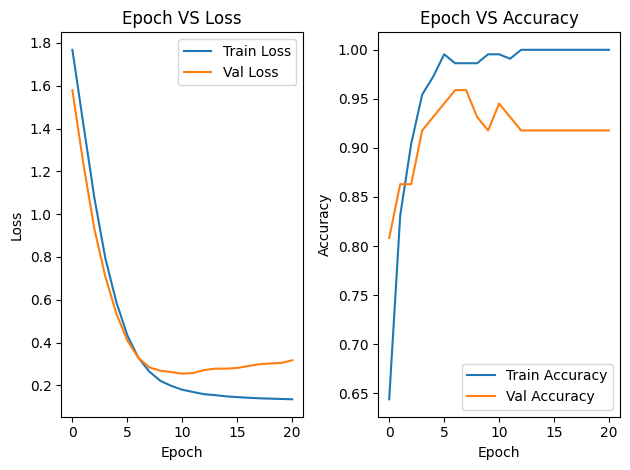

In [34]:
plt.subplot(1,2,1)
plt.plot(loss_train_list, label = 'Train Loss')
plt.plot(loss_val_list, label = 'Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Epoch VS Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(acc_train_list, label = 'Train Accuracy')
plt.plot(acc_val_list, label = 'Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Epoch VS Accuracy')
plt.legend()
plt.tight_layout()
plt.show()

In [35]:
# Load the best model
model.load_state_dict(best_model_state)
model.eval()
test_losses = 0
correct_test = 0
total_test = 0

with torch.no_grad():
  for x_batch, y_batch in test_loader:
    f_test, output_test = model(x_batch)
    ce_test = F.cross_entropy(output_test, y_batch)
    L_mv_test = Lmv_loss(f_test, y_batch, sigma, model.output.weight)
    L_mm_test = Lmm_loss(f_test, y_batch, model.output.weight)
    L_mvmm_test = 0.5 * (L_mv_test + L_mm_test)
    loss_total_test = ce_test + L_mvmm_test

    test_losses += loss_total_test.item() * x_batch.size(0)

    preds_test = output_test.argmax(dim = 1)
    correct_test += (preds_test == y_batch).sum().item()
    total_test += y_batch.size(0)
test_loss = test_losses / len(test_loader.dataset)
test_acc = correct_test / total_test
print(f'Test loss: {test_loss:.4f}, Test acc: {test_acc:.4f}')

Test loss: 0.2046, Test acc: 0.9865
